In [1]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score as ras
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, recall_score, f1_score
from sklearn.utils import resample

In [3]:
pip install gdown


Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import gdown

# Google Drive shareable link
link = 'https://drive.google.com/file/d/1vNGb0oV8VNiXXjZGtFVzcDeQIi8cVkq7/view'

# Extracting the ID of the file from its link
file_id = '1vNGb0oV8VNiXXjZGtFVzcDeQIi8cVkq7'

# Creating the direct download URL for the file
download_url = f'https://drive.google.com/uc?id={file_id}'

# Using gdown to download the file from the direct download URL
gdown.download(download_url, 'onlinefraud.csv', quiet=False)

# Loading the csv file into a pandas DataFrame
data = pd.read_csv('onlinefraud.csv')

# Printing the DataFrame
print(data)

Downloading...
From (original): https://drive.google.com/uc?id=1vNGb0oV8VNiXXjZGtFVzcDeQIi8cVkq7
From (redirected): https://drive.google.com/uc?id=1vNGb0oV8VNiXXjZGtFVzcDeQIi8cVkq7&confirm=t&uuid=d482643e-6413-46c3-8f4e-f93618a3ef0a
To: C:\Users\Swathi\onlinefraud.csv
100%|██████████| 494M/494M [00:58<00:00, 8.46MB/s] 


         step      type      amount     nameOrig  oldbalanceOrg  \
0           1   PAYMENT     9839.64  C1231006815      170136.00   
1           1   PAYMENT     1864.28  C1666544295       21249.00   
2           1  TRANSFER      181.00  C1305486145         181.00   
3           1  CASH_OUT      181.00   C840083671         181.00   
4           1   PAYMENT    11668.14  C2048537720       41554.00   
...       ...       ...         ...          ...            ...   
6362615   743  CASH_OUT   339682.13   C786484425      339682.13   
6362616   743  TRANSFER  6311409.28  C1529008245     6311409.28   
6362617   743  CASH_OUT  6311409.28  C1162922333     6311409.28   
6362618   743  TRANSFER   850002.52  C1685995037      850002.52   
6362619   743  CASH_OUT   850002.52  C1280323807      850002.52   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
0             160296.36  M1979787155            0.00            0.00        0   
1              19384.72  M2044282

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [7]:
data.sample(5)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2535280,205,CASH_OUT,186230.07,C542249945,0.00,0.00,C1899086295,1615589.15,1801819.22,0,0
3662745,275,PAYMENT,4030.11,C1784433444,0.00,0.00,M1771977271,0.00,0.00,0,0
2596892,208,PAYMENT,1991.36,C2055679223,491.00,0.00,M1611412071,0.00,0.00,0,0
124401,11,TRANSFER,29722.34,C2007679259,0.00,0.00,C751389024,902387.47,1218197.28,0,0
3415450,256,CASH_IN,28525.32,C53206586,1782257.24,1810782.56,C1582218261,4984735.44,4956210.12,0,0


In [8]:
data.isnull().sum()


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [9]:
from tabulate import tabulate
fraud_min_max = [
    ['amount', data.amount.min(), data.amount.max()],
    ['oldbalanceOrg', data.oldbalanceOrg.min(), data.oldbalanceOrg.max()],
    ['newbalanceOrig', data.newbalanceOrig.min(), data.newbalanceOrig.max()],
    ['oldbalanceDest', data.oldbalanceDest.min(), data.oldbalanceDest.max()],
    ['isFraud', data.isFraud.min(), data.isFraud.max()]
]

print(
    tabulate(
        fraud_min_max,
        headers=['columns', 'min value', 'max value'],
        showindex=True,
        tablefmt='github',
        numalign='right'
    )
)

|    | columns        |   min value |   max value |
|----|----------------|-------------|-------------|
|  0 | amount         |           0 | 9.24455e+07 |
|  1 | oldbalanceOrg  |           0 |  5.9585e+07 |
|  2 | newbalanceOrig |           0 |  4.9585e+07 |
|  3 | oldbalanceDest |           0 | 3.56016e+08 |
|  4 | isFraud        |           0 |           1 |


In [10]:
# Downcast numerical columns with smaller dtype
for col in data.columns:
    if data[col].dtype == 'float64':
        data[col] = pd.to_numeric(data[col], downcast='float')
    if data[col].dtype == 'int64':
        data[col] = pd.to_numeric(data[col], downcast='unsigned')

# Use category dtype for categorical column
data['type'] = data['type'].astype('category')

In [11]:
# Check duplicate values
data.duplicated().sum()

0

In [13]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (8,6)

In [14]:
#univaraiate data visualization
data['step'].value_counts()


step
19     51352
18     49579
187    49083
235    47491
307    46968
       ...  
432        4
706        4
693        4
112        2
662        2
Name: count, Length: 743, dtype: int64

C:\Users\Swathi\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, 'Number of transactions')

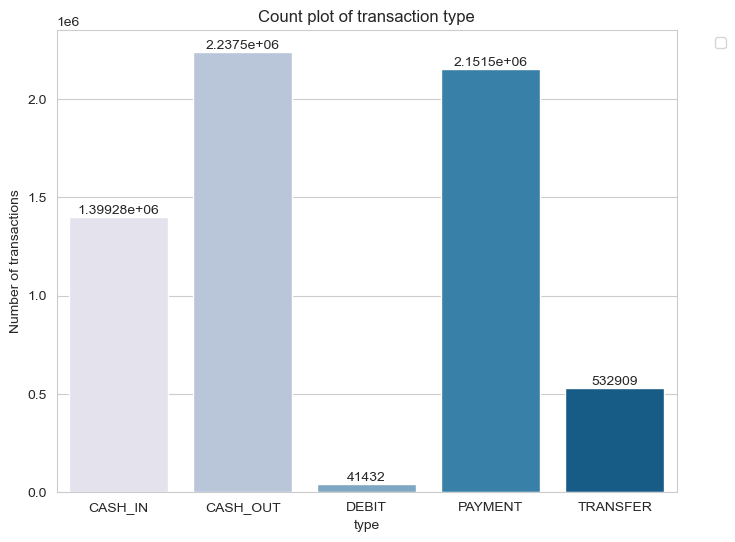

In [16]:
ax = sns.countplot(x='type', data=data, palette='PuBu')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of transaction type')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.ylabel('Number of transactions')

C:\Users\Swathi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution of transaction amount')

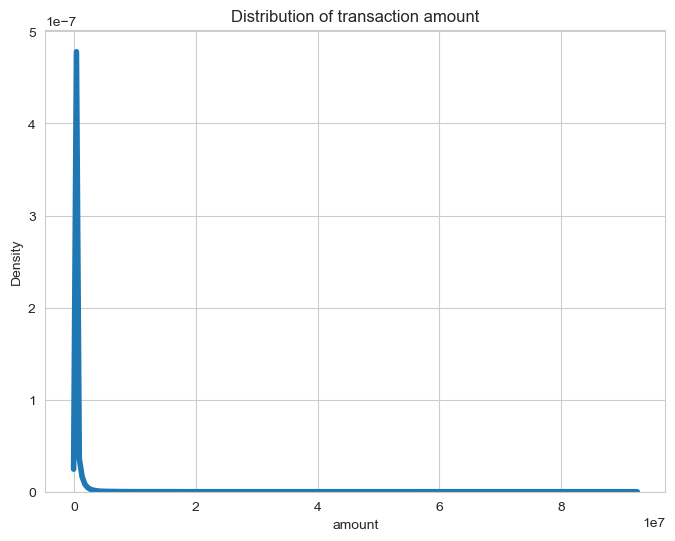

In [17]:
sns.kdeplot(data['amount'], linewidth=4)
plt.title('Distribution of transaction amount')

In [18]:
data['nameOrig'].value_counts()

nameOrig
C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
              ..
C98968405      1
C720209255     1
C1567523029    1
C644777639     1
C1280323807    1
Name: count, Length: 6353307, dtype: int64

C:\Users\Swathi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution of transaction amount')

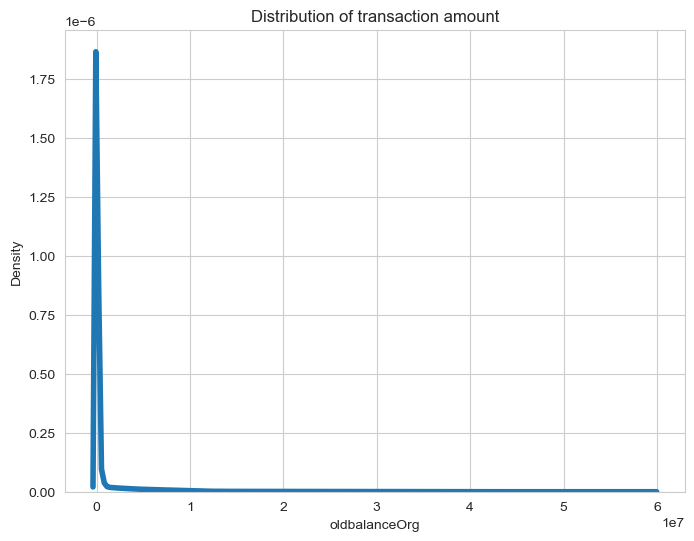

In [19]:
sns.kdeplot(data['oldbalanceOrg'], linewidth=4)
plt.title('Distribution of transaction amount')

C:\Users\Swathi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution of transaction amount')

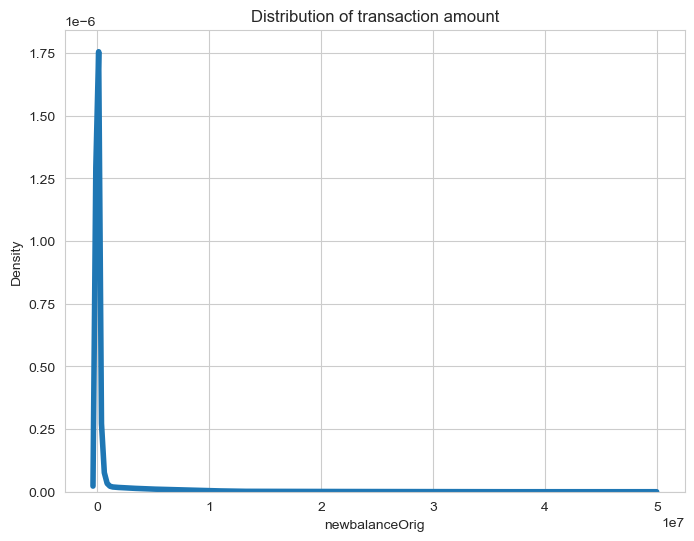

In [20]:
sns.kdeplot(data['newbalanceOrig'], linewidth=4)
plt.title('Distribution of transaction amount')

In [22]:
data['nameDest'].value_counts()

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
              ... 
M1470027725      1
M1330329251      1
M1784358659      1
M2081431099      1
C2080388513      1
Name: count, Length: 2722362, dtype: int64

C:\Users\Swathi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution of transaction amount')

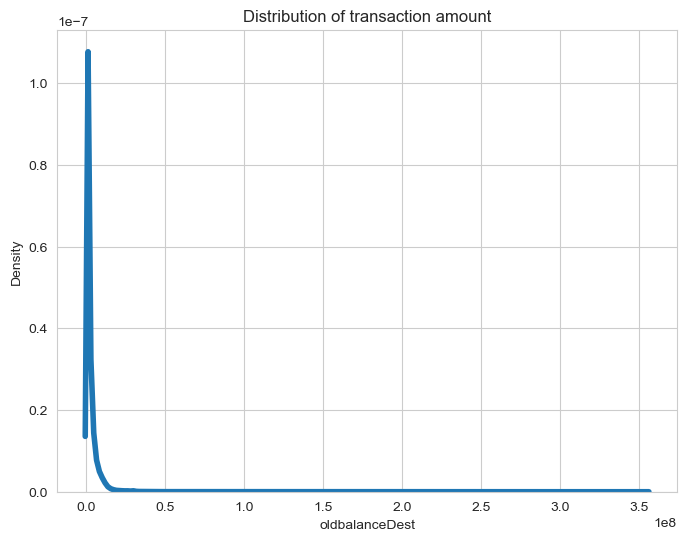

In [23]:
sns.kdeplot(data['oldbalanceDest'], linewidth=4)
plt.title('Distribution of transaction amount')

C:\Users\Swathi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution of transaction amount')

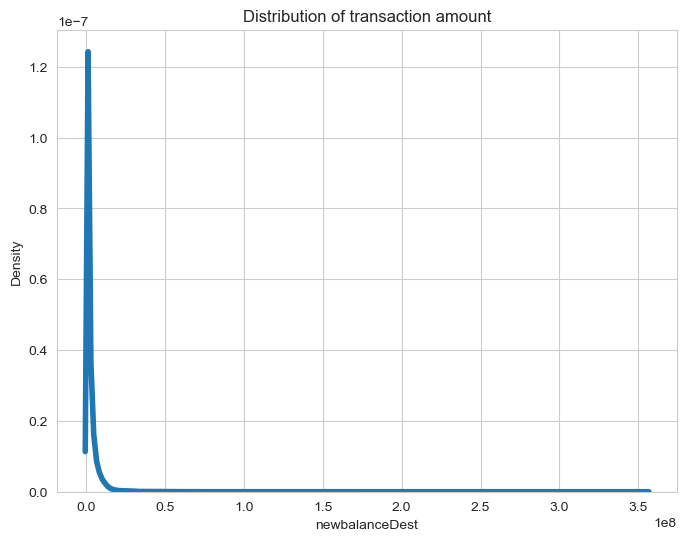

In [24]:
sns.kdeplot(data['newbalanceDest'], linewidth=4)
plt.title('Distribution of transaction amount')

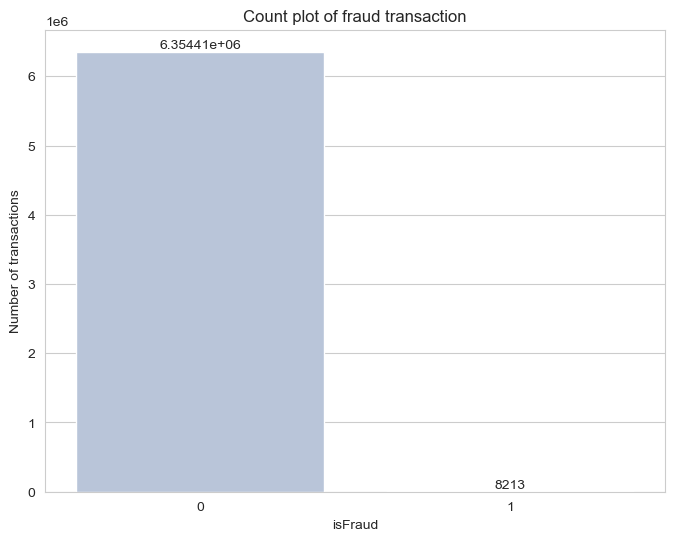

In [25]:
ax = sns.countplot(x='isFraud', data=data, palette='PuBu')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of fraud transaction')
plt.ylabel('Number of transactions')

del ax

C:\Users\Swathi\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\Swathi\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\Swathi\AppData\Local\Temp\ipykernel_3544\2869889224.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  

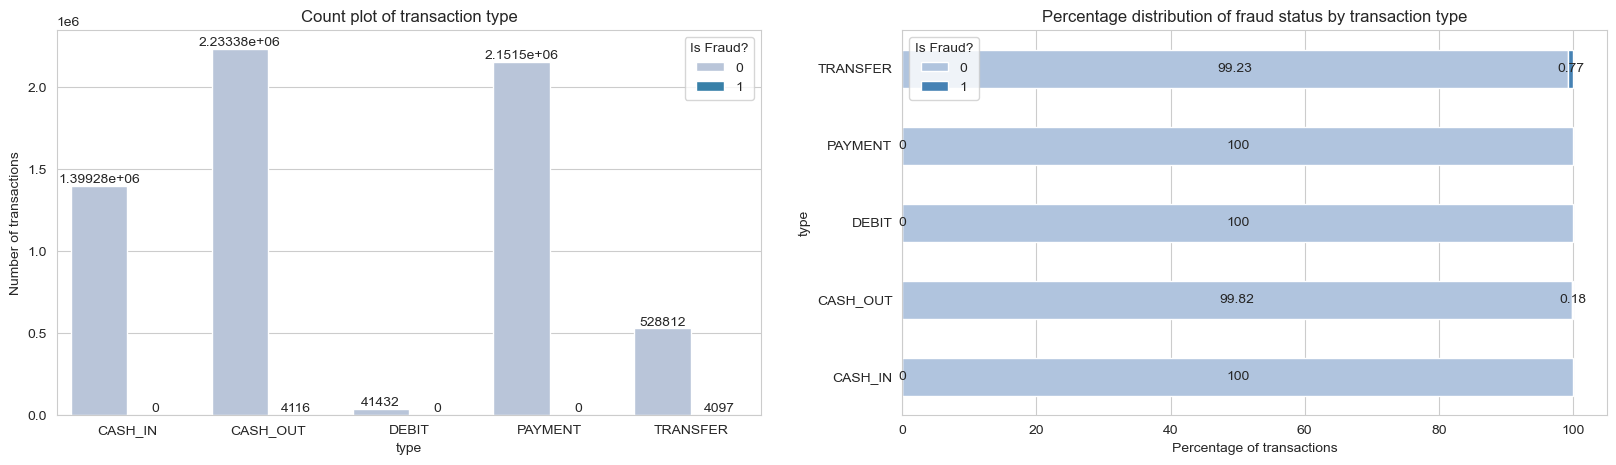

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'data' DataFrame is pre-defined and includes 'type' and 'isFraud' columns

# Convert 'isFraud' to string to ensure proper legend handling
data['isFraud'] = data['isFraud'].astype(str)

# Bivariate data visualization
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

# First plot: Count plot of transaction type by fraud status
sns.countplot(x='type', data=data, hue='isFraud', palette='PuBu', ax=ax[0])
for container in ax[0].containers:
    ax[0].bar_label(container)
ax[0].set_title('Count plot of transaction type')
ax[0].legend(title='Is Fraud?')  # Ensured the legend has a title
ax[0].set_ylabel('Number of transactions')

# Second plot: Percentage distribution of fraud status across transaction types
data2 = data.groupby(['type', 'isFraud']).size().unstack(fill_value=0)
data2_percent = data2.apply(lambda x: round(x / sum(x) * 100, 2), axis=1)
data2_percent.plot(kind='barh', stacked=True, color=['lightsteelblue', 'steelblue'], ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container, label_type='center')
ax[1].set_title('Percentage distribution of fraud status by transaction type')
ax[1].legend(title='Is Fraud?')  # Ensured the legend has a title
ax[1].set_xlabel('Percentage of transactions')
ax[1].grid(axis='y')


C:\Users\Swathi\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\Swathi\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


Text(0, 0.5, 'Number of transactions')

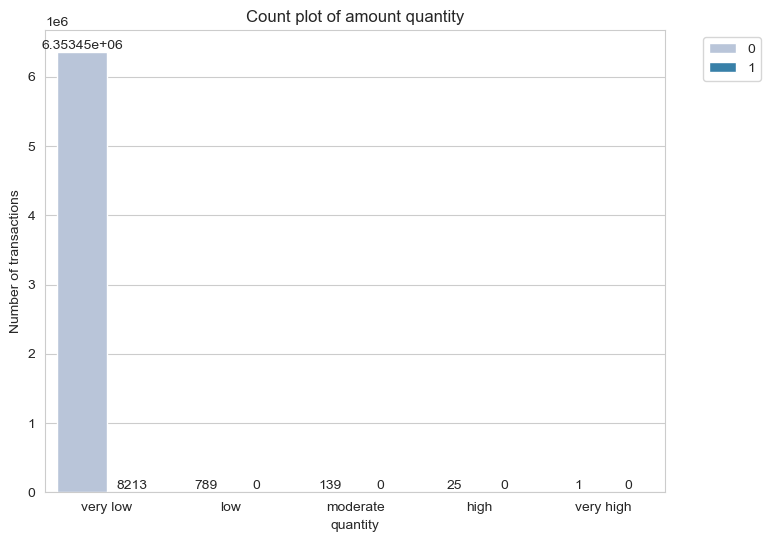

In [46]:
data['quantity'] = pd.cut(data['amount'], 5, labels=['very low', 'low', 'moderate', 'high', 'very high'])

ax = sns.countplot(x='quantity', data=data, hue='isFraud', palette='PuBu')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of amount quantity')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.ylabel('Number of transactions')

C:\Users\Swathi\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\Swathi\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


Text(0.5, 0, 'Initial customers pre-transaction balance amount')

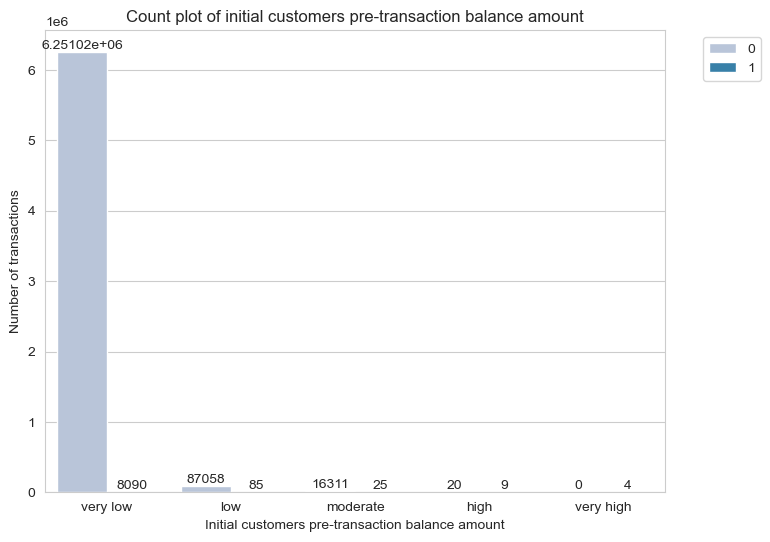

In [47]:
data['oldbalanceOrg_amt'] = pd.cut(data['oldbalanceOrg'], 5, labels=['very low', 'low', 'moderate', 'high', 'very high'])

ax = sns.countplot(x='oldbalanceOrg_amt', data=data, hue='isFraud', palette='PuBu')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of initial customers pre-transaction balance amount')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.ylabel('Number of transactions')
plt.xlabel('Initial customers pre-transaction balance amount')

C:\Users\Swathi\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\Swathi\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


Text(0.5, 0, 'Recipient pre-transaction balance amount')

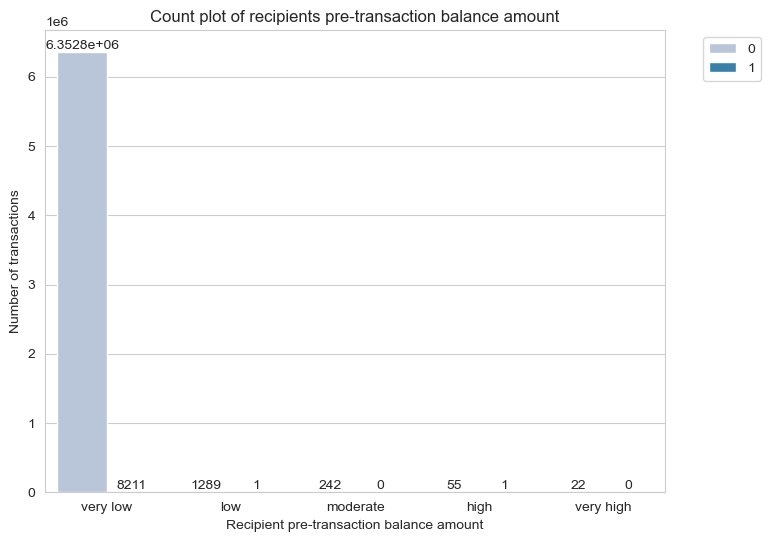

In [48]:
data['oldbalanceDest_amt'] = pd.cut(data['oldbalanceDest'], 5, labels=['very low', 'low', 'moderate', 'high', 'very high'])

ax = sns.countplot(x='oldbalanceDest_amt', data=data, hue='isFraud', palette='PuBu')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of recipients pre-transaction balance amount')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.ylabel('Number of transactions')
plt.xlabel('Recipient pre-transaction balance amount')

In [85]:
data = data.iloc[:,:-1]

In [50]:
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:", len(object_cols))

int_ = (data.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:", len(num_cols))

fl = (data.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:", len(fl_cols))


Categorical variables: 3
Integer variables: 0
Float variables: 5


C:\Users\Swathi\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='type', ylabel='count'>

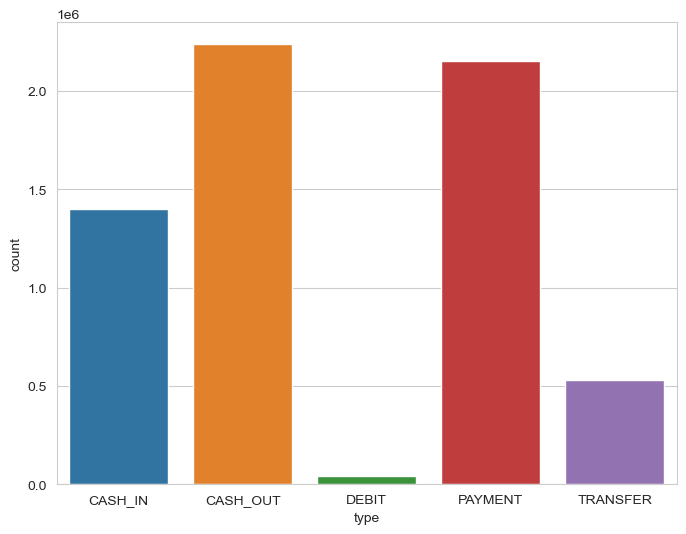

In [51]:
sns.countplot(x='type', data=data)


C:\Users\Swathi\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='type', ylabel='amount'>

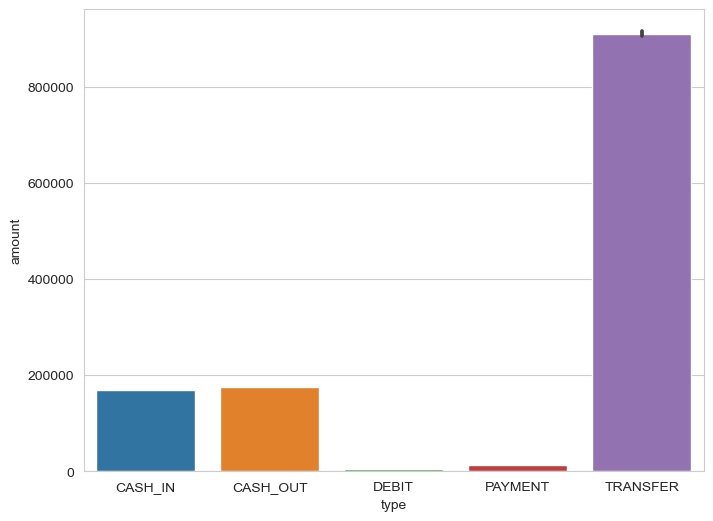

In [52]:
sns.barplot(x='type', y='amount', data=data)


In [53]:
data['isFraud'].value_counts()


isFraud
0    6354407
1       8213
Name: count, dtype: int64

C:\Users\Swathi\AppData\Local\Temp\ipykernel_3544\2319969707.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['step'], bins=50)
C:\Users\Swathi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='step', ylabel='Density'>

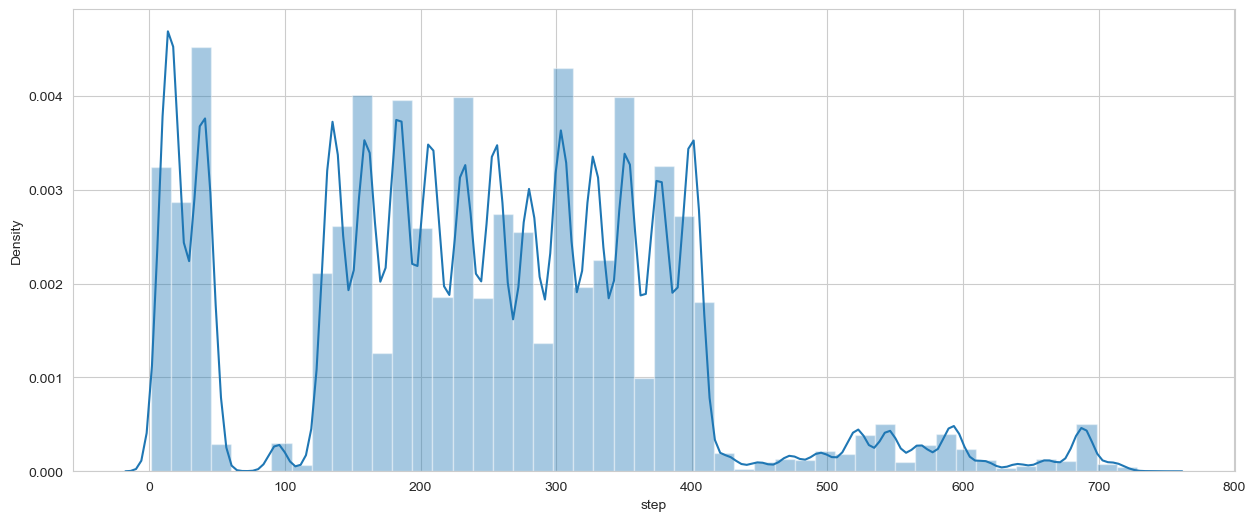

In [54]:
plt.figure(figsize=(15, 6))
sns.distplot(data['step'], bins=50)


<Axes: >

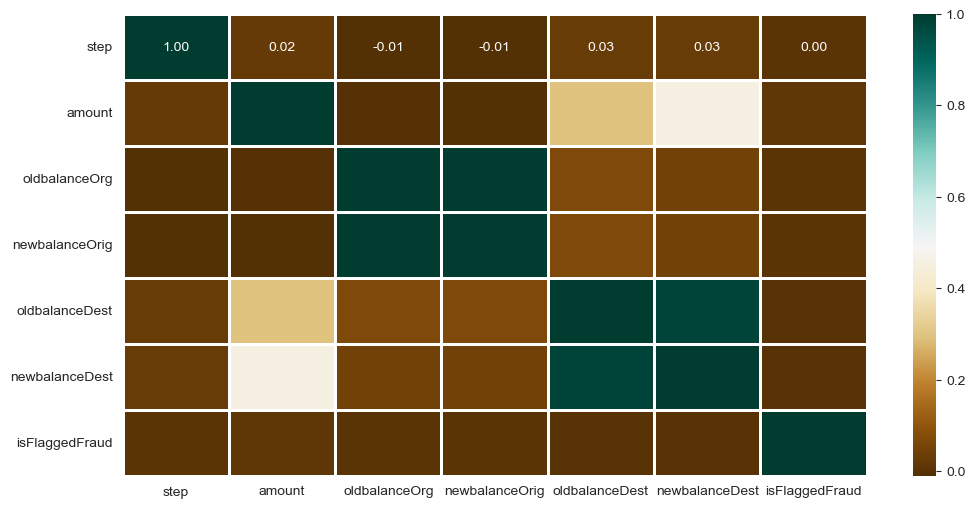

In [56]:
#multivariate data visualization
numeric_data = data.select_dtypes(include=['number'])
plt.figure(figsize=(12, 6))
sns.heatmap(numeric_data.corr(),
			cmap='BrBG',
			fmt='.2f',
			linewidths=2,
			annot=True)

In [57]:
#data preprocessing
import pandas as pd
type_new = pd.get_dummies(data['type'], drop_first=True)
data_new = pd.concat([data, type_new], axis=1)
data_new.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,quantity,oldbalanceOrg_amt,oldbalanceDest_amt,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,very low,very low,very low,False,False,True,False
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,very low,very low,very low,False,False,True,False
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,very low,very low,very low,False,False,False,True
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,very low,very low,very low,True,False,False,False
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,very low,very low,very low,False,False,True,False


In [58]:
X = data_new.drop(['isFraud', 'type', 'nameOrig', 'nameDest'], axis=1)
y = data_new['isFraud']

In [59]:
X.shape, y.shape


((6362620, 14), (6362620,))

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
	X, y, test_size=0.3, random_state=42)


In [62]:
#model building
# Data preprocessing
data['type'] = data['type'].map({'PAYMENT':0, 'CASH_IN':1, 'DEBIT':2, 'CASH_OUT':3, 'TRANSFER':4})

In [66]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, roc_curve, auc, ConfusionMatrixDisplay
import random

seed = 42
np.random.seed(seed)
random.seed(seed)


X = data.copy()
X.drop(['nameOrig', 'newbalanceOrig', 'nameDest', 'newbalanceDest', 'quantity', 'oldbalanceOrg_amt', 'oldbalanceDest_amt'], axis=1, inplace=True)
y = X.pop('isFraud')


# Stratified train-test split
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
for train_idx, test_idx in skfold.split(X,y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]


sc = StandardScaler()
scaled_train = sc.fit_transform(X_train)
scaled_test = sc.transform(X_test)
X_train = pd.DataFrame(scaled_train, index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaled_test, index=X_test.index, columns=X_test.columns)


X_train, y_train = RandomUnderSampler(sampling_strategy='majority').fit_resample(X_train, y_train)

In [68]:
def model_comparison_evaluate(classifiers, X, y):
    print('K-Fold Cross-Validation:\n')
    for name, model in classifiers.items():
        print('{}:'.format(name))
        
        scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
        
        for score in scoring:
            scores = cross_val_score(model, X, y, scoring=score, cv=skfold, n_jobs=-1)
            print('Mean {} score: {:.3f} ({:.3f})'.format(score, scores.mean(), scores.std()))
            
        print('\n')

In [69]:
classifiers = { 'Random Forest Classifier':RandomForestClassifier(class_weight='balanced', random_state=seed),
                'Logistic Regression': LogisticRegression(class_weight='balanced', random_state=seed)
              }

In [70]:
model_comparison_evaluate(classifiers, X_train, y_train)


K-Fold Cross-Validation:

Random Forest Classifier:
Mean accuracy score: 0.985 (0.003)
Mean precision score: nan (nan)
Mean recall score: nan (nan)
Mean f1 score: nan (nan)
Mean roc_auc score: 0.998 (0.001)


Logistic Regression:
Mean accuracy score: 0.848 (0.007)
Mean precision score: nan (nan)
Mean recall score: nan (nan)
Mean f1 score: nan (nan)
Mean roc_auc score: 0.927 (0.004)




Random Forest Classifier:
               precision    recall  f1-score   support

Non-Fraud [0]       1.00      0.97      0.99   1270881
    Fraud [1]       0.05      1.00      0.09      1643

     accuracy                           0.97   1272524
    macro avg       0.52      0.99      0.54   1272524
 weighted avg       1.00      0.97      0.99   1272524
 



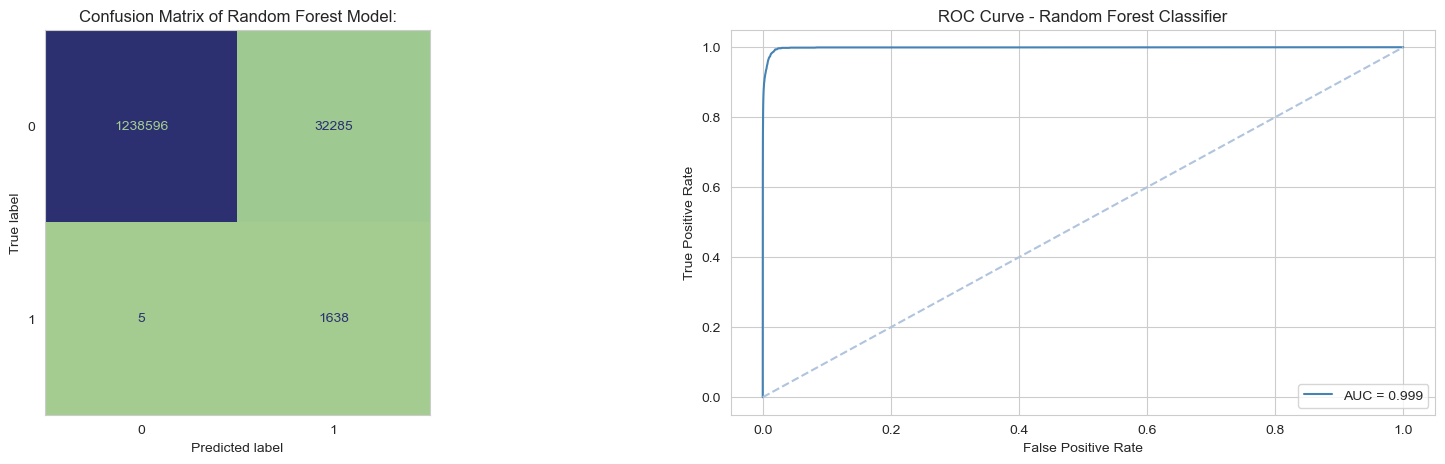

In [75]:
# Convert y_test to integer type
y_test = y_test.astype(int)

# Predict and convert y_pred to integer type
y_pred = model.predict(X_test).astype(int)  # Ensure y_pred is of integer type

# Predict probabilities for the positive class (1)
y_pred_score = model.predict_proba(X_test)[:, 1]

print('Random Forest Classifier:')
# Now y_test and y_pred are of the same type, this should work without error
print(classification_report(y_test, y_pred, labels=[0, 1], target_names=['Non-Fraud [0]', 'Fraud [1]']), '\n')

# Plotting Confusion Matrix
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
ax[0].set_title('Confusion Matrix of Random Forest Model:')
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, colorbar=False, values_format='', cmap='crest', ax=ax[0])
ax[0].grid(False)

# Generating ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_score, pos_label=1)  # Explicitly setting pos_label
roc_auc = auc(fpr, tpr)
ax[1].set_title('ROC Curve - Random Forest Classifier')
ax[1].plot(fpr, tpr, label='AUC = %0.3f' % roc_auc, c='steelblue')
ax[1].plot([0, 1], [0, 1], '--', c='lightsteelblue')
ax[1].legend(loc='lower right')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_xlabel('False Positive Rate')

plt.show()


In [76]:
recall = recall_score(y_test, y_pred)
recall

0.996956786366403

In [77]:
f1 = f1_score(y_test, y_pred)
f1

0.09211044255749874

In [78]:
roc_auc = ras(y_test, y_pred)
roc_auc

0.9857765745235474

In [79]:
con_data = pd.concat([X, y], axis=1)
non_fraud = con_data[con_data['isFraud'] == 0]
fraud = con_data[con_data['isFraud'] == 1]

num_samples = min(len(non_fraud), len(fraud))
non_fraud_undersampled = resample(non_fraud, replace=False, 
                                  n_samples=num_samples, random_state=42)

balanced_df = pd.concat([non_fraud_undersampled, fraud])

balanced_df = balanced_df.sample(frac=1, random_state=42)

In [80]:
balanced_df['isFraud'].value_counts()


Series([], Name: count, dtype: int64)